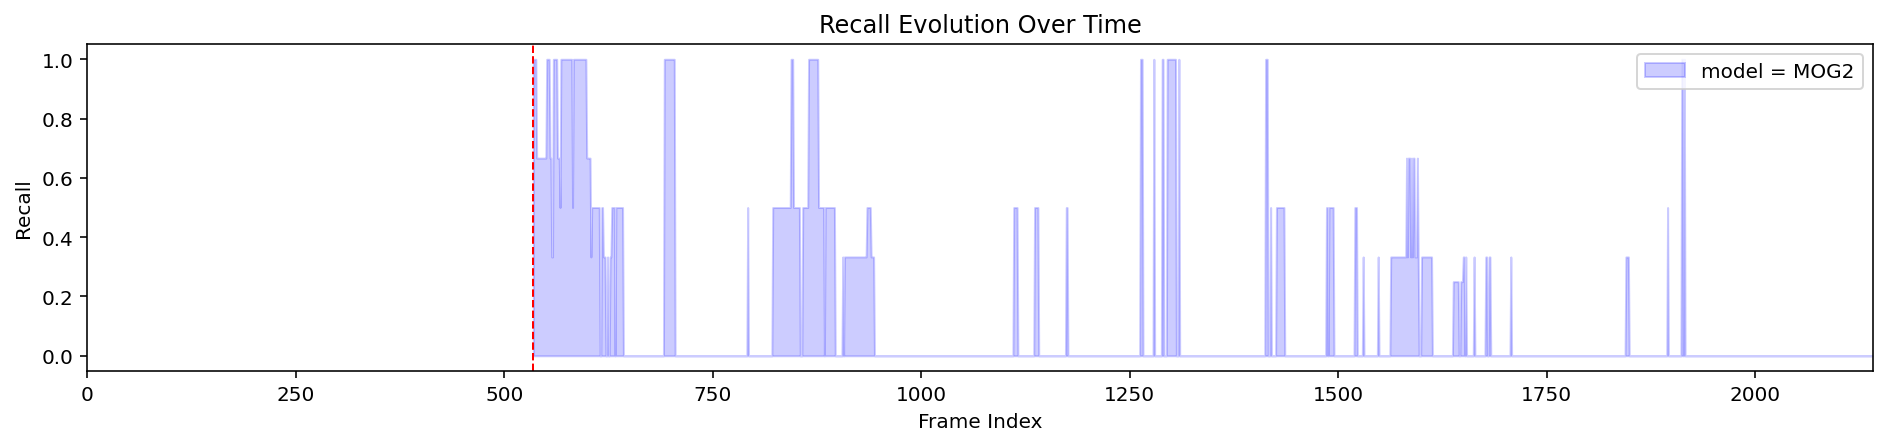

In [28]:
import matplotlib.pyplot as plt
import pickle

total_frames = 2141
start_frame = 535

filename = './../model_logs/AR_model_CNT.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_CNT = data['recall_list']

filename = './../model_logs/AR_model_KNN.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_KNN = data['recall_list']

filename = './../model_logs/AR_model_LSBP.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_LSBP = data['recall_list']

filename = './../model_logs/AR_model_MOG.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_MOG = data['recall_list']

filename = './../model_logs/AR_model_MOG2.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
precision_list_MOG2 = data['recall_list']


frame_indices = list(range(start_frame, start_frame + len(precision_list_CNT)))

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 3))

plt.fill_between(frame_indices, precision_list_MOG2, color='blue', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.fill_between(frame_indices, precision_list_a6, color='orange', alpha=0.2)  # Adjust alpha for opacity as desired
#plt.fill_between(frame_indices, precision_list_a10, color='green', alpha=0.2)  # Adjust alpha for opacity as desired

plt.axvline(x=start_frame, color='red', linestyle='--', linewidth=1, label='\alpha = 6')

plt.title('Recall Evolution Over Time')
plt.xlabel('Frame Index')
plt.ylabel('Recall')
plt.legend(['model = MOG2'])

plt.xlim(0, total_frames)

plt.show()


Model: CNT => recall avg = 0.015593310798790243
Model: KNN => recall avg = 0.5389165628891653
Model: LSBP => recall avg = 0.11928110805757122
Model: MOG => recall avg = 0.452067890252823
Model: MOG2 => recall avg = 0.1373193777303367


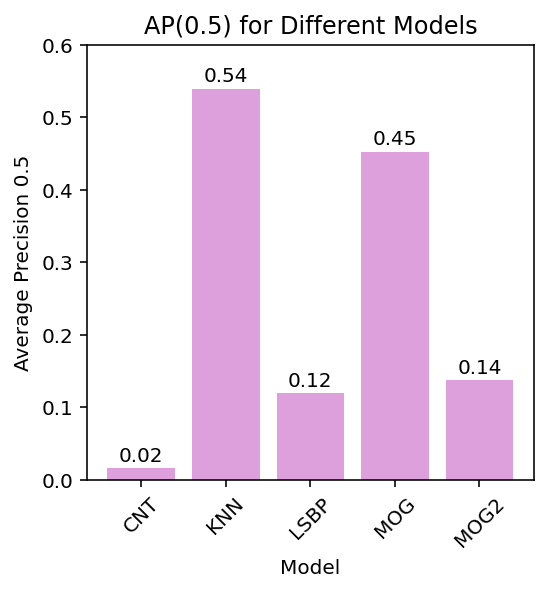

In [19]:
model_recalls = {}

model_names = ["CNT", "KNN", "LSBP", "MOG", "MOG2"]

for name in model_names:
    filename = f'./../model_logs/AR_model_{name}.pkl'
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    recall_list = data['recall_list']
    model_recalls[name] = sum(recall_list) / len(recall_list)
    print(f"Model: {name} => recall avg = {sum(recall_list) / len(recall_list)}")


recalls = list(model_recalls.keys())
avg_recalls = list(model_recalls.values())

plt.figure(figsize=(4, 4))
plt.bar(recalls, avg_recalls, color='plum')

plt.title('AR(0.5) for Different Models')
plt.xlabel('Model')
plt.ylabel('Average Recall 0.5')
plt.ylim(0, 0.5)


for i in range(len(recalls)):
    plt.text(i, avg_recalls[i] + 0.01, f"{avg_recalls[i]:.2f}", ha = 'center')

plt.xticks(rotation=45)
plt.show()
